## Author :- Pulkit Udenia


### Data Science & Business Analytics Internship @THE SPARKS FOUNDATION  GRIPJULY21 

## TASK 1 - Prediction using Supervised ML

####  Problem Statement: To Predict the percentage of marks of the students based on the number of hours they studied
Dataset: http://bit.ly/w-data

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Reading the data

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
# printing the first 8 rows of the data
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


## Analyzing the Data

In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Check if there any null value in the Dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### As there is no null values in the dataset, we can now visualize our data

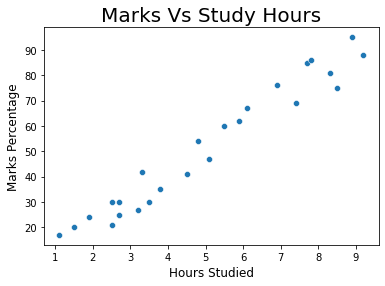

In [7]:
# Plotting the scatter plot
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### From the above scatterplot, we can clearly see that there is a positive linear relation between the "Number of hours studied" and "Percentage of score" as both variables changing in the same direction.

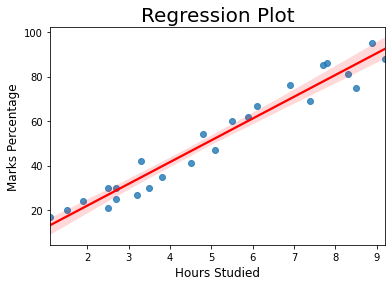

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
# Plotting the data on Regression plot
sns.regplot(x= data['Hours'], y= data['Scores'], line_kws={"color": "red"})
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In [9]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

## Splitting the dataset into Training and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Training the Linear Regression Model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Model is trained")

Model is trained


In [12]:
print(regressor.intercept_)
print(regressor.coef_)

1.932204253151646
[9.94167834]


## Making prediction on test set

In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

##  Comparing the Actual marks and the Predicted Marks

In [14]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted Marks with the Actual Marks

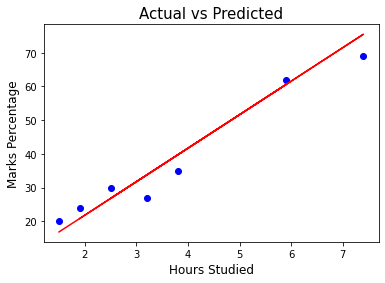

In [15]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Red')
plt.title('Actual vs Predicted', size=15)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluating the model

In [16]:
from sklearn import metrics as m

print('Mean Absolute Error:', 
      m.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502486


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

#### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [17]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


#### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.